In [0]:
import tarfile
tar = tarfile.open('/content/emotions.tar.gz')
tar.extractall()
tar.close()

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os
from collections import Counter


# Credits: https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
# LSTM for sequence classification in the IMDB dataset
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

from keras.layers import Embedding
from keras.layers import Dense,LSTM
from keras import Input
import numpy as np
np.random.seed(0)
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation,Reshape
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform
import keras
from keras.models import load_model, Model
from keras.layers import Dense, Activation, Dropout, Input, LSTM, Reshape, Lambda, RepeatVector
from keras.initializers import glorot_uniform
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras import backend as K
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from keras.models import Sequential
import tensorflow as tf
from sklearn.metrics import roc_auc_score
 
from keras.layers import Dense
from keras.utils import np_utils
from keras.callbacks import Callback, EarlyStopping

In [0]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [0]:
def list_data(path):
  list_data= []
  for i in os.listdir(path):
    data = pd.read_csv( path + '/' + str(i), sep=",", header=None)
    list_data.append(data[0][0]) 
  return list_data


In [0]:
angry_list  = list_data('/content/emotions/angry')

In [0]:
happy_list  = list_data('/content/emotions/happy')

In [0]:
sad_list  = list_data('/content/emotions/sad')

In [0]:
neutral_list  = list_data('/content/emotions/neutral')

In [0]:
all_words=set()
for line in sad_list:
    for word in line.split(' '):
        if word not in all_words:
            all_words.add(word)

for line in neutral_list:
    for word in line.split(' '):
        if word not in all_words:
            all_words.add(word)   

for line in happy_list:
    for word in line.split(' '):
        if word not in all_words:
            all_words.add(word)        

for line in angry_list:
    for word in line.split(' '):
        if word not in all_words:
            all_words.add(word)                         

### Adding all text into a single List

In [0]:
list_sentences = sad_list + neutral_list + happy_list + angry_list

In [0]:
df = pd.DataFrame()

In [0]:
output_y = []

for i in range(len(sad_list)):
  output_y.append(1)
for i in range(len(neutral_list)):
  output_y.append(2)
for i in range(len(happy_list)):
  output_y.append(3)
for i in range(len(angry_list)):
  output_y.append(4)      

### Shuffling the Dataframe

In [0]:
df['text'] = list_sentences

In [0]:
df['output'] =output_y
from sklearn.utils import shuffle
df = shuffle(df)

In [0]:
list_sentences = df['text'] 

In [0]:
output_y = df['output'] 

In [632]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()

y_train = np.array(output_y)
y_encoded = onehot_encoder.fit_transform(y_train.reshape(-1,1)).toarray()
print('outputs_encoded.shape after One Hot Encode', y_encoded.shape)

outputs_encoded.shape after One Hot Encode (513, 4)


### text Processing using keras Tokenizer

In [633]:
maxLen = len(max(list_sentences, key=len).split())
maxLen

11

In [634]:
from keras.preprocessing.text import Tokenizer

t = Tokenizer()
t.fit_on_texts(list_sentences)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(list_sentences)
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 12
padded_docs = sequence.pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[21, 72, 73, 30, 329, 25, 4, 161], [124, 73], [7, 12, 25, 1], [91, 162, 65, 330, 103, 104, 105], [48, 22, 22, 331, 43, 26, 1], [85, 216, 125, 332, 126, 29, 9], [49, 333, 1, 2], [217, 2, 86, 50, 4, 38, 26, 1], [98], [12, 72, 163, 334, 164, 1], [12, 33, 218, 34, 16], [60, 33, 335, 6, 52], [219, 220, 53, 44, 1, 41, 54, 13], [28, 49, 221, 1, 2], [106, 54, 18, 45, 124], [222, 5, 223, 10, 92, 127, 3, 107], [12, 9, 336, 337, 35, 22, 4, 16, 5], [11, 61, 74, 224, 4, 225, 60], [27, 46, 49, 19, 3, 23, 108], [87, 226, 12, 1], [14, 338, 10, 62, 339, 39], [2, 128, 227, 340], [2, 55, 1], [11, 129, 20, 75, 1, 36, 76], [85, 37, 18, 341, 9, 35, 105], [5, 42, 342, 34, 4, 165, 26], [21, 72, 73, 30, 343, 4, 77], [130, 31, 92, 127, 6, 228, 93], [11, 34, 55, 229, 22, 230], [109, 44, 131, 56, 344, 4, 132], [49, 19, 4, 110], [66, 345, 21, 29, 346], [63, 7, 99, 4, 39], [2, 231, 347, 1], [21, 72, 111, 232, 112, 13, 12, 233], [348, 10, 94, 166, 349, 41], [17, 46, 15, 49, 19, 88, 3], [50, 4, 38, 26, 5, 2, 133, 24

In [635]:
len(all_words)

690

In [0]:
num_tokens = len(all_words)
num_tokens += 1

### Generating Contextual vectors for each word using Gensim

In [0]:
from keras import backend as K 

K.clear_session()

In [0]:
token_index = dict([(word, i+1) for i, word in enumerate(all_words)])

In [639]:
text_corpus_list = []
for i in tqdm(range(0,len(list_sentences))):
  text_corpus_list.append(list_sentences[i].split(' '))

model = Word2Vec(text_corpus_list,min_count=1,size=300,window=10,negative=7)

model[text_corpus_list[0][3]]  

100%|██████████| 513/513 [00:00<00:00, 59773.81it/s]


array([ 1.16039775e-02,  7.53988000e-03, -6.57401234e-03, -7.29825289e-04,
       -4.60733427e-05, -6.72684936e-03, -9.57152457e-04, -3.00211646e-03,
        4.73287795e-03, -1.11946194e-02,  1.36111146e-02, -5.56545798e-03,
        1.51941343e-03,  7.37223588e-03, -4.90617845e-03, -9.68606304e-03,
       -1.06288921e-02,  3.00836260e-03, -3.00184661e-03,  2.62075779e-03,
        5.36325481e-03,  8.57522991e-03,  3.71033861e-03, -1.99985225e-03,
        9.59226454e-04, -2.19092071e-02,  9.90538858e-03,  6.46429043e-03,
       -1.58365781e-03, -2.97650998e-03,  3.39854485e-03, -2.25581252e-03,
        2.90202955e-03, -1.01802219e-02,  8.20792280e-04, -3.15146404e-03,
       -1.03681041e-02,  7.15728384e-03,  7.84268323e-03, -2.05760007e-03,
       -1.30895311e-02,  2.98568117e-03,  4.08644695e-03,  6.39497256e-03,
       -6.57713786e-03, -7.02761160e-03, -1.30712625e-03, -8.33657943e-03,
        3.29026743e-03, -3.85361898e-04,  3.36923543e-03, -6.57787453e-03,
       -1.33302383e-04,  

### creating Embedding Matrix for Vectors

In [640]:
word_vectors = model.wv
len(word_vectors.vocab)

690

In [0]:
embedding_matrix = np.zeros((len(word_vectors.vocab), 300))
for word, i in t.word_index.items():
  if word in word_vectors.vocab and word in t.word_index.keys():
    embedding_vector = model[word]
    if embedding_vector is not None:
      
      embedding_matrix[i] = embedding_vector

### Model for Non-Contextual-vectors without a Embedding Matrix

Intialize Vectors for Each word with random vectors and Learn those Vectors

In [0]:
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
sequence_input = Input(shape=(12,))
# Embedding Layer
embedded_sequences = Embedding(num_tokens,output_dim=150,input_length=12)(sequence_input)
# LSTM  Layer using Sequence from Backward-last
# LSTM  Layer using Sequence from Forward Sequence
lstm_2_model = Bidirectional(LSTM(64,return_sequences=True,dropout=0.5))(embedded_sequences)


flatten_layer = Flatten()
X_2 = flatten_layer(lstm_2_model)

### Training Bi-directional LSTM using a Contextual vectors obtained from gensim

In [0]:
embedded_sequences_question = Embedding(len(word_vectors.vocab),output_dim=300,weights=[embedding_matrix],input_length=12,trainable=False)(sequence_input)

lstm_out_model_backward_1 = Bidirectional(LSTM(64,return_sequences=True,dropout=0.25))(embedded_sequences_question)

flatten_layer = Flatten()
X = flatten_layer(lstm_out_model_backward_1)

### Concatenate Output of LSTM's from Non-contextual and Contextual Vectors

In [0]:
numerical_concatenate_5 = keras.layers.concatenate([X,X_2],axis=-1)

### Train Few Dense Layers at the End

In [0]:
Dense_1 = Dense(128, activation='relu')(numerical_concatenate_5)
dropout_1 = Dropout(0.5)(Dense_1)
Dense_2 = Dense(64, activation='relu')(dropout_1)
dropout_2 = Dropout(0.5)(Dense_2)
Dense_3 = Dense(32, activation='relu')(dropout_2)

predictions = Dense(4, activation='softmax')(Dense_3)

In [0]:
model_1 = Model(inputs= [
                         sequence_input], outputs = predictions)

In [647]:
model_1.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 12)           0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 12, 300)      207000      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 12, 150)      103650      input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 12, 128)      186880      embedding_2[0][0]                
____________________________________________________________________________________________

### Store the Best Model while training which has the highest Val-Accuracy

In [0]:
from sklearn.metrics import roc_curve, auc
opt = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, decay=0.01)
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# creating a model checkpoint which monitirs the training Loss 
from keras.callbacks import ModelCheckpoint
# Model stores the Parameters of Best Model which has low training-Loss
filepath = "/content/drive/My Drive/quadratyx/weights_full_train-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [650]:
history = model_1.fit([padded_docs[:400]],y_encoded[:400],epochs = 30,batch_size=32,validation_data=([padded_docs[400:]],y_encoded[400:]),callbacks=callbacks_list)

Train on 400 samples, validate on 113 samples
Epoch 1/30
400/400 [==============================] - 5s 13ms/step - loss: 1.6637 - acc: 0.2225 - val_loss: 1.5561 - val_acc: 0.2566

Epoch 00001: val_acc improved from -inf to 0.25664, saving model to /content/drive/My Drive/quadratyx/weights_full_train-01-0.26.hdf5
Epoch 2/30
400/400 [==============================] - 1s 3ms/step - loss: 1.6483 - acc: 0.2225 - val_loss: 1.3614 - val_acc: 0.4690

Epoch 00002: val_acc improved from 0.25664 to 0.46903, saving model to /content/drive/My Drive/quadratyx/weights_full_train-02-0.47.hdf5
Epoch 3/30
400/400 [==============================] - 1s 2ms/step - loss: 1.3989 - acc: 0.2900 - val_loss: 1.3270 - val_acc: 0.3451

Epoch 00003: val_acc did not improve from 0.46903
Epoch 4/30
400/400 [==============================] - 1s 3ms/step - loss: 1.3053 - acc: 0.3975 - val_loss: 1.2528 - val_acc: 0.4248

Epoch 00004: val_acc did not improve from 0.46903
Epoch 5/30
400/400 [==============================

### Model Diagram

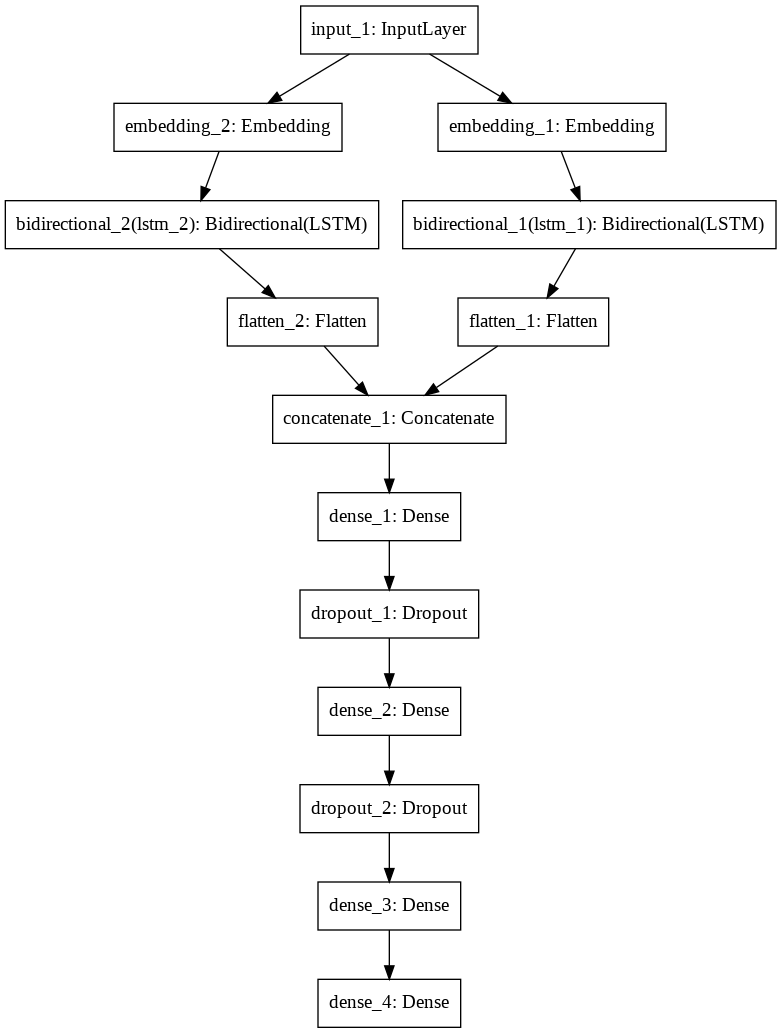

In [651]:
from keras.utils import plot_model
plot_model(model_1, to_file='model.png')

### Model's plot's Train and Valid-ACC

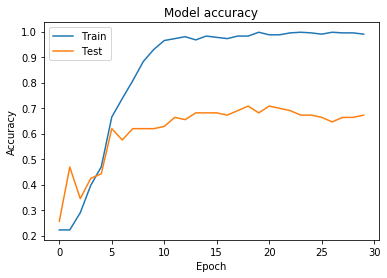

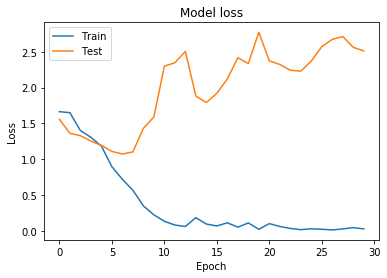

In [652]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Load the Best Model

In [0]:
from keras.models import load_model

model_1 = load_model('/content/drive/My Drive/quadratyx/weights_full_train-21-0.71.hdf5')

### train Confusion matrix, Precision Matrix, Recall Matrix

In [0]:
y_predicted_train = model_1.predict([padded_docs[:400]])

In [0]:
y_predicted_label= [np.argmax(y_predicted_train[i])+1 for i in range(y_predicted_train.shape[0])]

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
import seaborn as sns
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    # C = 17,17 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    # Confusion matrix
    labels = ['sad','neutral','happy','angry']
    cmap=sns.light_palette("red")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(17,4))
    sns.heatmap(C, annot=True, cmap=cmap, fmt='d',xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # PRECISION MATRIX
    print("-"*50, "Precision matrix", "-"*50)
    cmap=sns.light_palette("green")
    plt.figure(figsize=(17,4))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".2g", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # RECALL MATRIX
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    cmap=sns.light_palette("blue")
    plt.figure(figsize=(17,4))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".2g", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))
    # how many images are wrongly Predicted
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)

-------------------------------------------------- Confusion matrix --------------------------------------------------


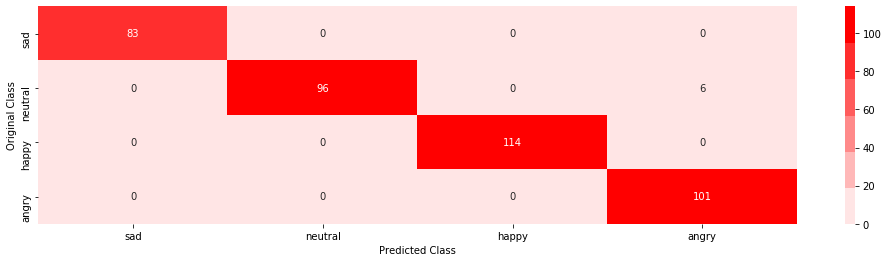

-------------------------------------------------- Precision matrix --------------------------------------------------


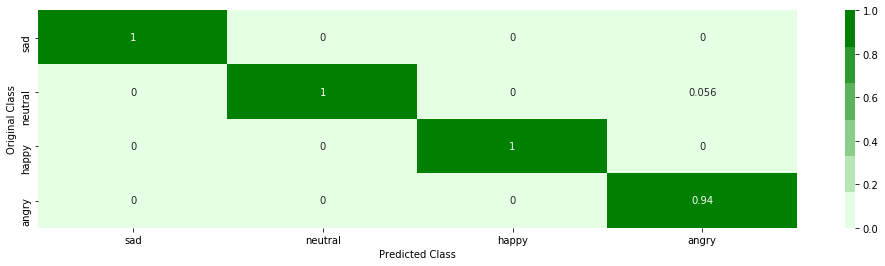

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


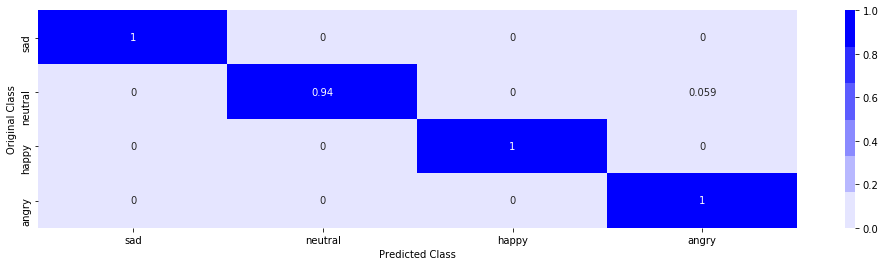

Sum of rows in precision matrix [1. 1. 1. 1.]
Number of misclassified points  1.5


In [575]:
plot_confusion_matrix(output_y[:400],y_predicted_label)

### Test Confusion Matrix, PrecisionMatrix,Recall Matrix

In [0]:
y_predicted_test = model_1.predict([padded_docs[400:]])

y_predicted_label= [np.argmax(y_predicted_test[i])+1 for i in range(y_predicted_test.shape[0])]

-------------------------------------------------- Confusion matrix --------------------------------------------------


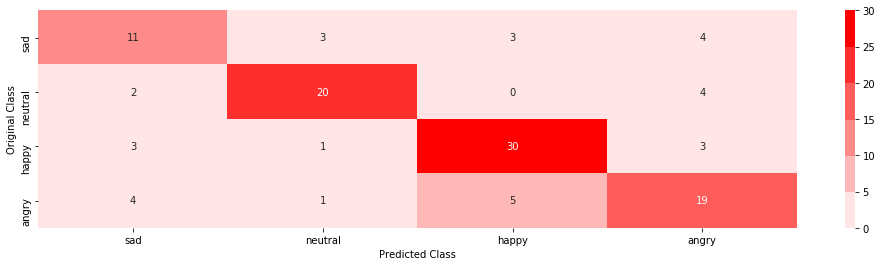

-------------------------------------------------- Precision matrix --------------------------------------------------


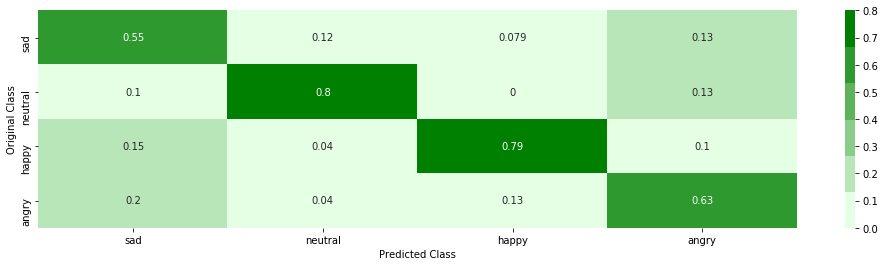

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


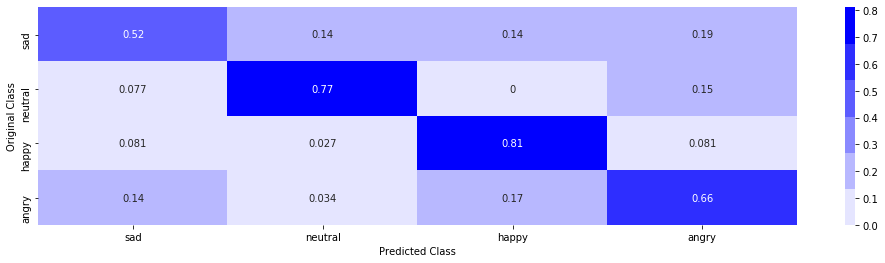

Sum of rows in precision matrix [1. 1. 1. 1.]
Number of misclassified points  29.20353982300885


In [577]:
plot_confusion_matrix(output_y[400:],y_predicted_label)